In [1]:
pip uninstall pymc3

Uninstalling pymc3-3.7:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pymc3-3.7.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pymc3/*
Proceed (y/n)? y
  Successfully uninstalled pymc3-3.7


In [2]:
pip install pymc3


     |████████████████████████████████| 870kB 6.1MB/s 
     |████████████████████████████████| 1.8MB 10.3MB/s 
     |████████████████████████████████| 1.6MB 34.8MB/s 
     |████████████████████████████████| 4.7MB 50.2MB/s 
     |████████████████████████████████| 808kB 42.7MB/s 
     |████████████████████████████████| 317kB 39.0MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-cp37-none-any.whl size=1529948 sha256=39e322d6241d51423762234a2d32d666c2785a9ba44bcfef496aa2e92bfe1872
  Stored in directory: /root/.cache/pip/wheels/bd/5a/32/a5690ce4309abc60e1776ad3d3b408ead6da77ccced26ee723
Successfully built theano-pymc
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


# Acknowledgements 
 1. GCM model - Bayesian Cognitive Modeling
A Practical Course D.LEE
 2. Coding - 
*   http://pymc.io
*   https://github.com/pymc-devs
*  https://github.com/pymc-devs/resources/blob/master/BCM/CaseStudies/TheGCMModelofCategorization.ipynb
3. Model Diagrams made in MS word.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
import pandas as pd
import math
from theano import tensor as tt
import seaborn as sns
from matplotlib.pyplot import figure



# Data Pre-Processing

In [12]:
data ={'y': [[245], [218], [255], [126], [182], [71], [102], [65]], 'd1': [[0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0]], 'd2': [[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0]], 'nstim': 8, 'nsubj': 40, 'a': [1, 1, 1, 2, 1, 2, 2, 2], 'x': [[5, 6, 6, 2, 4, 1, 3, 1], [5, 6, 8, 0, 3, 1, 5, 2], [7, 7, 8, 6, 1, 2, 2, 3], [7, 7, 6, 3, 5, 4, 0, 1], [8, 6, 8, 7, 3, 3, 1, 0], [8, 7, 8, 3, 4, 0, 0, 0], [6, 5, 5, 3, 3, 1, 4, 1], [8, 8, 6, 4, 4, 0, 1, 0], [7, 8, 8, 4, 7, 0, 3, 0], [8, 8, 8, 7, 4, 1, 1, 0], [8, 8, 8, 3, 3, 0, 1, 0], [7, 6, 7, 4, 3, 1, 1, 0], [7, 8, 7, 1, 3, 0, 0, 3], [7, 6, 8, 2, 5, 0, 1, 0], [8, 4, 6, 5, 4, 3, 4, 2], [7, 7, 8, 5, 4, 5, 2, 0], [8, 8, 7, 3, 5, 0, 1, 0], [8, 6, 7, 6, 4, 2, 1, 1], [8, 6, 8, 1, 2, 0, 1, 0], [8, 6, 8, 4, 5, 1, 0, 0], [5, 6, 6, 3, 1, 2, 2, 1], [3, 4, 4, 5, 4, 5, 1, 2], [3, 3, 5, 3, 7, 2, 5, 5], [5, 3, 6, 2, 4, 1, 5, 1], [5, 6, 6, 1, 7, 1, 3, 3], [8, 7, 3, 4, 7, 5, 2, 0], [6, 3, 7, 3, 6, 1, 5, 6], [8, 8, 6, 3, 5, 1, 0, 0], [2, 3, 4, 2, 7, 6, 6, 4], [6, 5, 6, 1, 4, 1, 1, 1], [4, 2, 3, 3, 4, 5, 4, 6], [6, 6, 6, 2, 7, 2, 1, 1], [5, 1, 7, 0, 6, 0, 7, 3], [4, 2, 5, 0, 6, 1, 8, 4], [7, 6, 7, 6, 3, 1, 0, 3], [6, 7, 3, 4, 8, 6, 2, 3], [8, 7, 7, 3, 6, 1, 2, 1], [3, 3, 5, 3, 2, 3, 4, 3], [4, 0, 8, 0, 7, 0, 7, 1], [2, 3, 6, 5, 5, 2, 5, 3]], 'n': 8}

In [13]:
print(data.keys())
data["y"]

dict_keys(['y', 'd1', 'd2', 'nstim', 'nsubj', 'a', 'x', 'n'])


[[245], [218], [255], [126], [182], [71], [102], [65]]

In [14]:
partcpnts = data['nsubj']
n_stim = data['nstim']
t = 40 * 8 

In [15]:
temp={}
for i in data:
  if i not in ['n','nsubj','nstim','x']:  
    #p#rint(i,len(data[i]))
    temp[i]=data[i]
overall_stimdata=pd.DataFrame(temp)
overall_stimdata['y']=[i[0] for i in overall_stimdata['y']]
overall_stimdata['a'] = 2-overall_stimdata['a']
d1 = np.array(data['d1'])
d2 = np.array(data['d2'])
#print(d1)
a1=np.repeat(overall_stimdata.a.to_numpy(), 8).reshape(8, 8).T# ro compuute similarity scores
overall_stimdata

,y,d1,d2,a
0,245,"[0.0, 0.0, 1.0000499999999999, 1.0000499999999...","[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, ...",1
1,218,"[0.0, 0.0, 1.0000499999999999, 1.0000499999999...","[1.1750500000000001, 0.0, 2.00405, 1.054949999...",1
2,255,"[1.0000499999999999, 1.0000499999999999, 0.0, ...","[0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829...",1
3,126,"[1.0000499999999999, 1.0000499999999999, 0.0, ...","[2.23, 1.0549499999999998, 3.059, 0.0, 3.059, ...",0
4,182,"[1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.1...","[0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829...",1
5,71,"[1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.1...","[2.23, 1.0549499999999998, 3.059, 0.0, 3.059, ...",0
6,102,"[3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1....","[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, ...",0
7,65,"[3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1....","[1.1750500000000001, 0.0, 2.00405, 1.054949999...",0


## Questions
### (a) Construct a dependency diagram for the model choosing relevant priors and justifying your choice of priors.
### (b) Run MCMC simulations, plot the distributions and 95% HDI intervals, choose credible values for parameters and draw conclusions.
### (d) We chose the bias parameter b = 0.5 assuming no bias between the two categories. Is that a good choice?  Check to see what happens if b is allowed to be a free parameter that is estimated by the data.


Below Cell shows model duaigrams for questions a/b and d.
let us  consider noninformative priors for parameters  c,w,b.
from GCM literature it is clear that w is attention weight , b is response bias and hence take values from 0 to 1.
Where C is genralisation parameter ranging from 0 to 10 

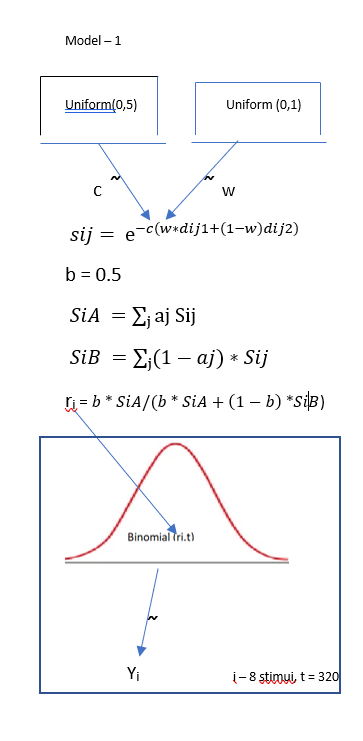
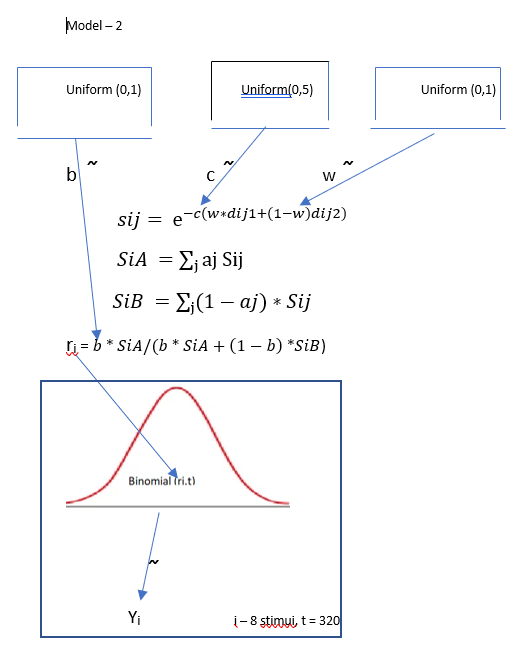

##(b) Run MCMC simulations, plot the distributions and 95% HDI intervals, choose credible values for parameters and draw conclusions.
After running the model we could see the credible values are
c - 0.98
w - 0.58


suggesting that 
w attention weight, both the dimensions of the stimuli have equal contribution in categorising the stimuli.
And model performed decently well in in predicting in sample data from Post predictive plot 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, c]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 6 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/plots/jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
/usr/local/lib/pytho

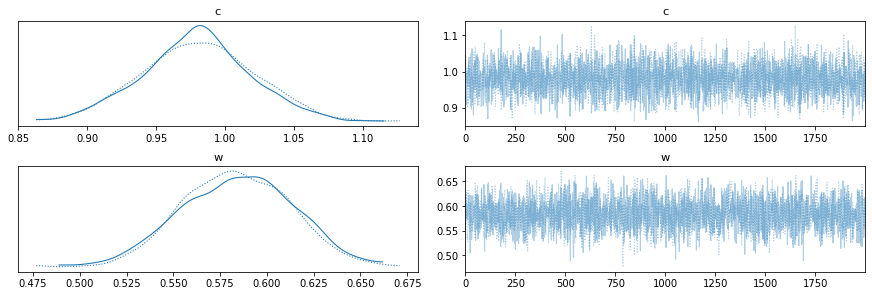

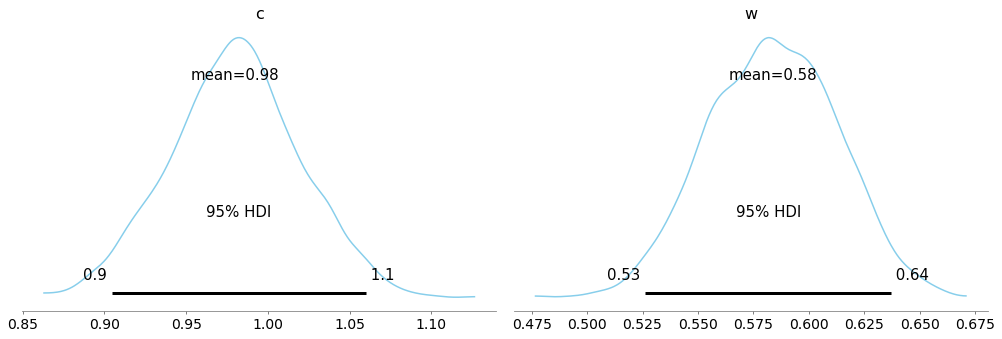

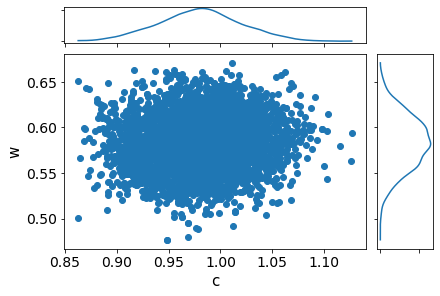

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c,0.980,0.040,0.908,1.058,0.001,0.0,3617.0,2998.0,1.0
w,0.584,0.029,0.531,0.638,0.000,0.0,3573.0,3001.0,1.0


In [16]:
with pm.Model() as model1:
    c = pm.Uniform("c", lower=0, upper=10)
    w = pm.Uniform("w", lower=0, upper=1)
    b = 0.5
    sij = np.exp(-c * (w * d1 + (1 - w) * d2))
    sum_ajsij = tt.sum(a1 * sij, axis=1)
    sum_majsij = tt.sum((1 - a1) * sij, axis=1)

    ri = (b * sum_ajsij) / (b * sum_ajsij + (1 - b) * sum_majsij)
    yi = pm.Binomial("yi", p=ri, n=t, observed=overall_stimdata.y.to_numpy())

    trace1 = pm.sample(2000)

az.plot_trace(trace1, var_names=["c", "w"]);
pm.plot_posterior(trace1,  color='skyblue',hdi_prob=0.95,var_names=["c","w"])
pm.plot_joint(trace1)
plt.show()
pm.summary(trace1)

In [17]:
print('Credible values for model1')
map_estimate = pm.find_MAP(model=model1)
map_estimate


Credible values for model1


{'c': array(0.98037945),
 'c_interval__': array(-2.21921786),
 'w': array(0.58430628),
 'w_interval__': array(0.34047655)}

# post predictive check for model1

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


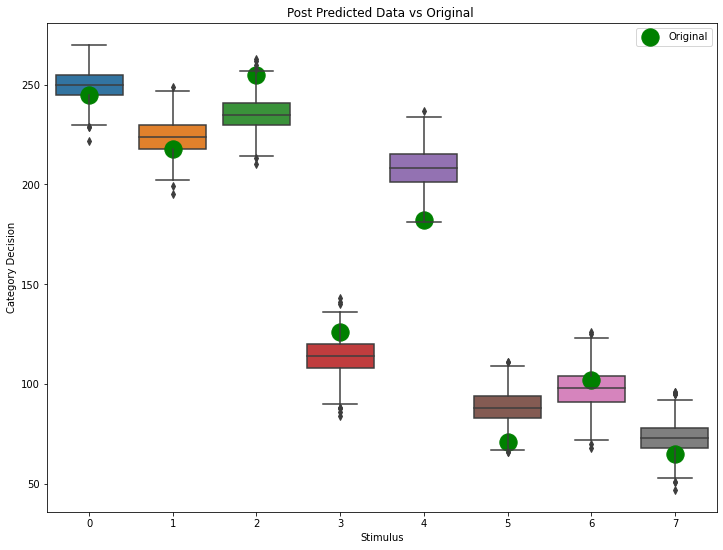

In [18]:
ppc = pm.sample_posterior_predictive(trace1, samples=500, model=model1)
yipred = ppc["yi"]
_, axes = plt.subplots(1, 1, figsize=(12, 9))
sns.boxplot(data =ppc['yi'],ax=axes )
#plt.boxplot(ppc['yi'],patch_artist=True)
plt.scatter(np.arange(0,8),overall_stimdata.y,color = 'g',s=300,label ='Original')
axes.set_title("Post Predicted Data vs Original ")
axes.set_xlabel("Stimulus")
axes.set_ylabel("Category Decision");
plt.legend()
plt.show()
#'''
#y_pred_g_1 = az.from_pymc3(model=model1, trace=trace1, posterior_predictive=ppc )
#ax = az.plot_ppc(y_pred_g_1 , figsize=(12, 6), mean=False)
#'''

# model2
# (d) We chose the bias parameter b = 0.5 assuming no bias between the two categories. Is that a good choice? Check to see what happens if b is allowed to be a free parameter that is estimated by the data.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  del sys.path[0]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, w, c]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 6 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


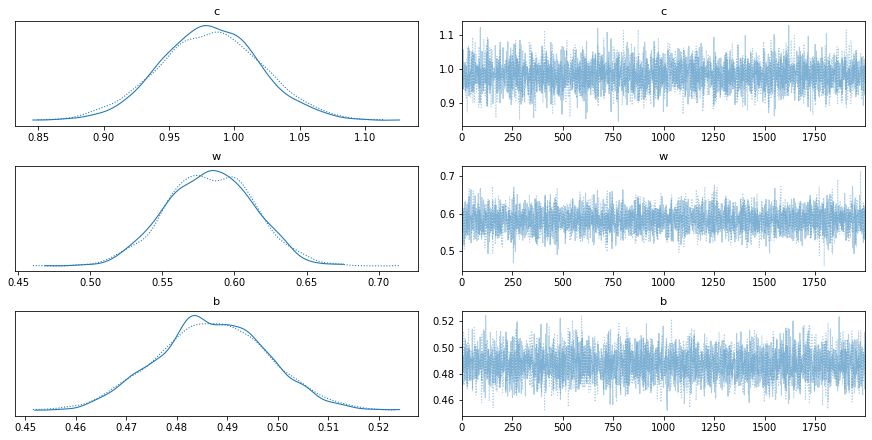

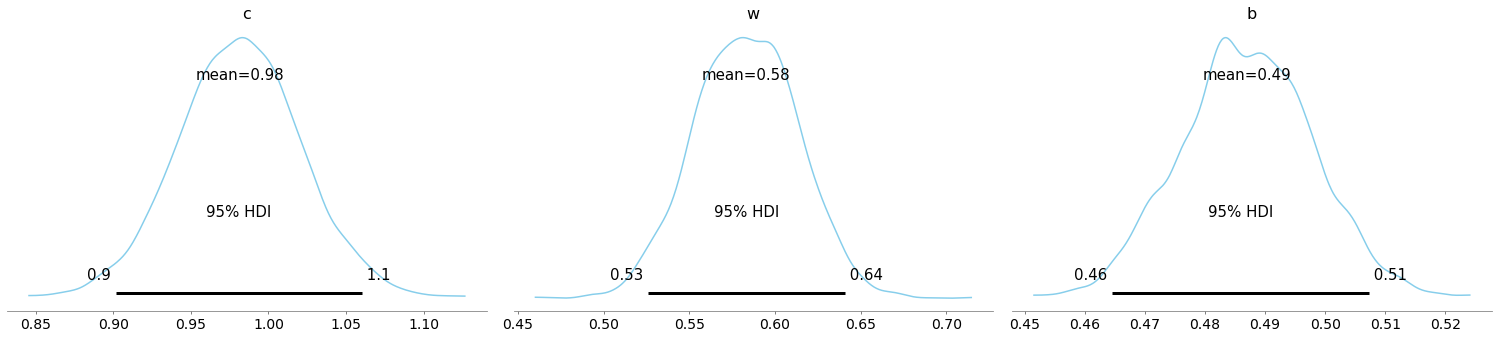

In [19]:
with pm.Model() as model2:
    c = pm.Uniform("c", lower=0, upper=5)
    w = pm.Uniform("w", lower=0, upper=1)
    b = pm.Uniform("b", lower=0, upper=1)
    sij = tt.exp(-c * (w * d1 + (1 - w) * d2))

    sum_ajsij = tt.sum(a1 * sij, axis=1)# numerator
    sum_majsij = tt.sum((1 - a1) * sij, axis=1)# not a group

    ri = (b * sum_ajsij) / (b * sum_ajsij + (1 - b) * sum_majsij)
    yi = pm.Binomial("yi", p=ri, n=t, observed=overall_stimdata.y.to_numpy())

    trace2 = pm.sample(2000)

az.plot_trace(trace2, var_names=["c", "w","b"]);
pm.plot_posterior(trace2,  color='skyblue',hdi_prob=0.95,var_names=["c", "w","b"])
plt.show()
#pm.summary(trace2)

# ppc for model2

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


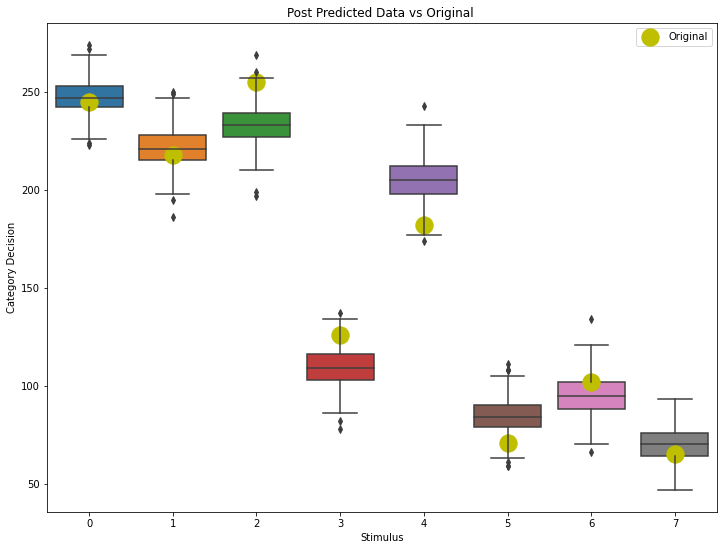

In [20]:
ppc2 = pm.sample_posterior_predictive(trace2, samples=500, model=model2)
yipred2 = ppc2["yi"]
_, axes = plt.subplots(1, 1, figsize=(12, 9))
sns.boxplot(data =ppc2['yi'],ax=axes )
#plt.boxplot(ppc['yi'],patch_artist=True)
plt.scatter(np.arange(0,8),overall_stimdata.y,color = 'y',s=300,label ='Original')
axes.set_title("Post Predicted Data vs Original ")
axes.set_xlabel("Stimulus")
axes.set_ylabel("Category Decision");
plt.legend()
plt.show()

# compare model 1  and model2

By looking at credible values of c,w, b from the model2, looks like it is resinable choice to have b equals to 0.5.

c - 0.9 to 1.1  - credible value - 0.98
w - 0.53 to 0.64 - credible value - 0.58
b - 0.47 to 0.51 - credible value - 0.49

Model 2 also performed decetly well in Post predictive check, and but less waic score than model 1.
Hence model 1 is preferred over model2.

In [21]:
df_comp_WAIC = az.compare({"model1": trace1, "model2": trace2},ic='WAIC')
df_comp_WAIC

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1407: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWar

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model1,0,-40.615318,5.752247,0.0000,0.876123,5.560095,0.000000,True,log
model2,1,-42.983418,9.295093,2.3681,0.123877,6.176946,2.772724,True,log


# 2c
(c) Are all 40 participant behaviours similar or are there individual variations that can be grouped such
that the 40 participants can grouped into two or more categories based on the performance data? Use
visualisation to see if you spot any patterns then do an analysis based on the patterns you see. In
particular you may need a new dependency model

In [26]:
subjectdata = pd.DataFrame(data['x'],columns=['stim'+str(i) for i in range(1,9)])
subjectdata.head(5)

,stim1,stim2,stim3,stim4,stim5,stim6,stim7,stim8
0,5,6,6,2,4,1,3,1
1,5,6,8,0,3,1,5,2
2,7,7,8,6,1,2,2,3
3,7,7,6,3,5,4,0,1
4,8,6,8,7,3,3,1,0


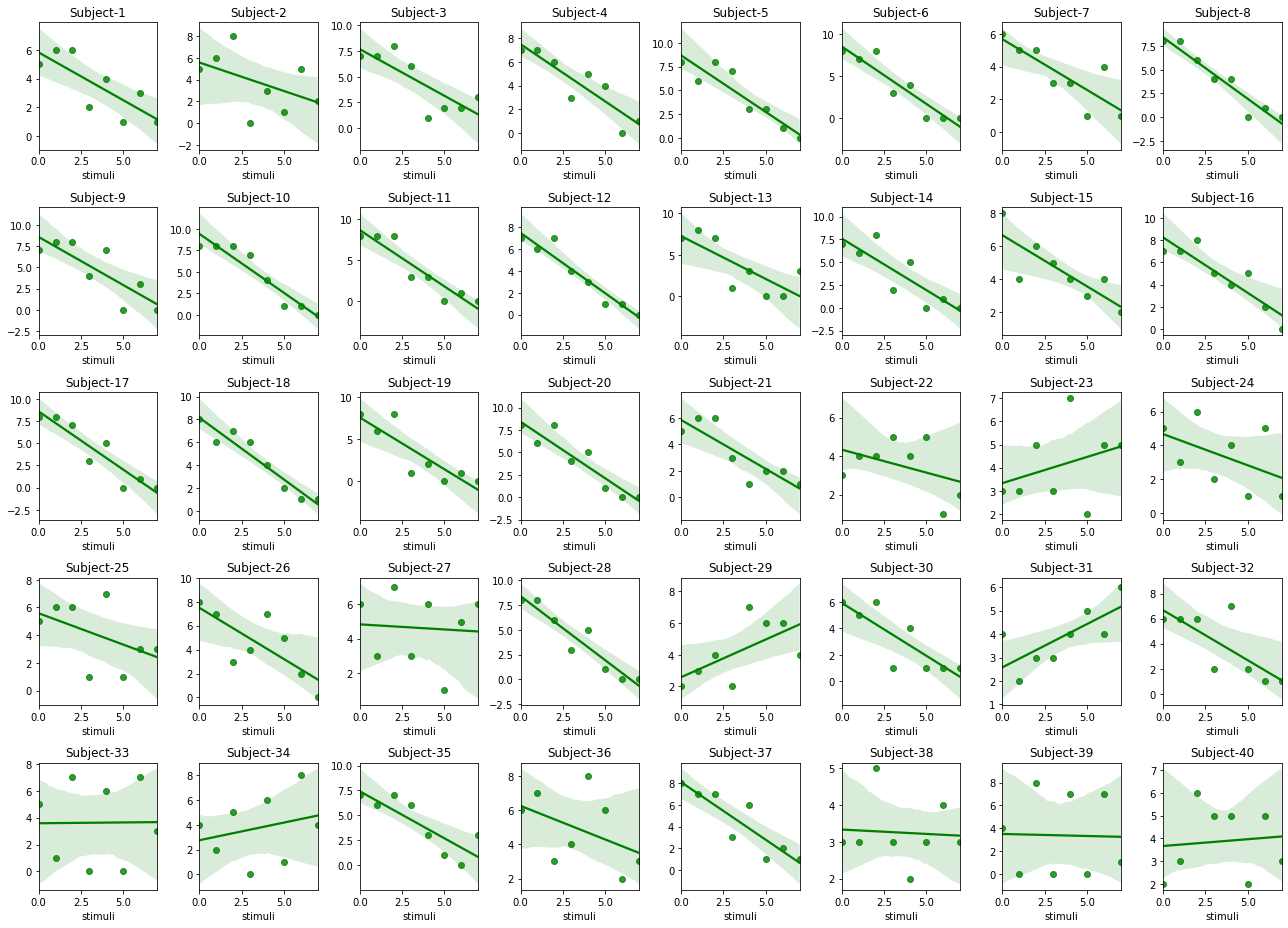

In [27]:
fig, ax = plt.subplots(5,8)
i,j=0,0
for row in subjectdata.iterrows():
  #print (row)
  #break
  if(j%8==0):
    j=0
  #plt.plot()
  title = 'Subject-'+str(i+1)  
  
  #ax[int(i/8), j].plot(row[1][:-1].values,)
  sns.regplot(ax=ax[int(i/8), j],x=np.arange(0,8), y=row[1].values, color="g")

  #ax[int(i/8), j].set_xticks(np.arange(1,9))
  #pm.plot_posterior(trace['theta'], ax=ax[p,i], color='skyblue');
  ax[int(i/8), j].set_title(title) 
  ax[int(i/8), j].set_xlabel('stimuli')
  j=j+1
  i=i+1
fig.set_figheight(13)
fig.set_figwidth(18)
fig.tight_layout() 
plt.show()  

# By Visual observation segreate above subjects into folowing groups
1. decreasing trend like subject 3
2. irregular  trend like subject 39
3. Increasing trend like subject 31


           stim1  stim2  stim3  stim4  stim5  stim6  stim7  stim8
group_idx                                                        
-1             8      7      7      4      4      1      1      0
 0             5      4      6      2      6      1      4      2
 1             3      3      5      3      6      2      5      4


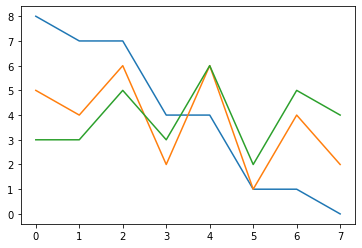

In [28]:
irregular_indices = np.array([2,7,22,24,25,27,32,33,36,38,39])-1#11
incresing_trend = np.array([23,29,31,34,40])-1 #5
decreasing_trend = np.array([1,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,30,21,26,28,30,35,37])-1 #24

number_grp = 3
#l = [22, 13, 45, 50, 98, 69, 43, 44, 1]
subjectdata['group_idx']=[0 if i  in irregular_indices else 1 if i in incresing_trend else -1 for i in range(40)]
subject_grp_data = subjectdata.groupby('group_idx').median().round(0).astype(int)
print(subject_grp_data)
for row in subject_grp_data.iterrows():
  plt.plot(row[1].values)
  

In [29]:
#subject_grp_data.to_numpy()
x2 = subject_grp_data.to_numpy()
subjvect = []
stimvect = []
respvect = []
for i in range(8):
    for j in range(number_grp):
        subjvect.append(j + 1)
        stimvect.append(i + 1)
        respvect.append(x2[j, i])
#df = pd.DataFrame(np.c_[respvect, stimvect, subjvect], columns=["Resp", "Stim", "Grp"])
a1 = np.tile(overall_stimdata.a, [n_stim, 1])[:, :, np.newaxis]
y2 = x2.transpose()
d1_t = np.tile(d1[:, :, np.newaxis], [1, 1, number_grp])
d2_t = np.tile(d2[:, :, np.newaxis], [1, 1, number_grp])
#df.sample(20)
df= ''

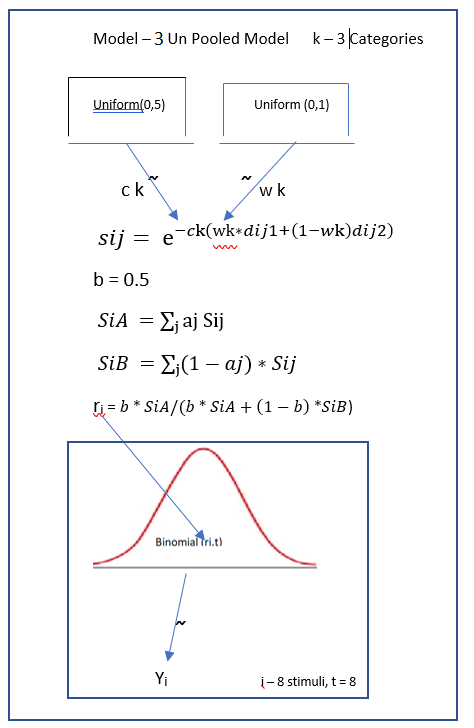

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, c]


Sampling 2 chains for 4_000 tune and 2_000 draw iterations (8_000 + 4_000 draws total) took 14 seconds.
There were 1765 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3593 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  Fu

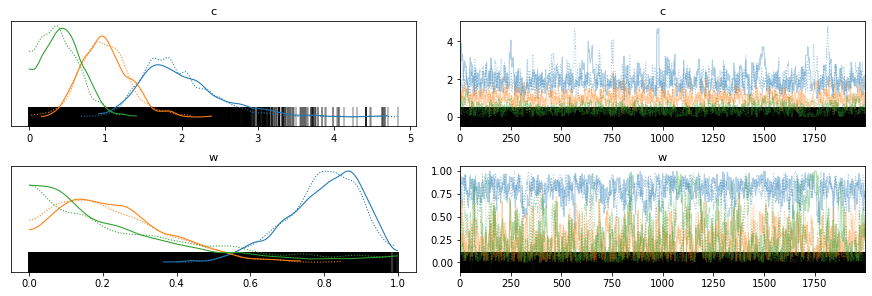

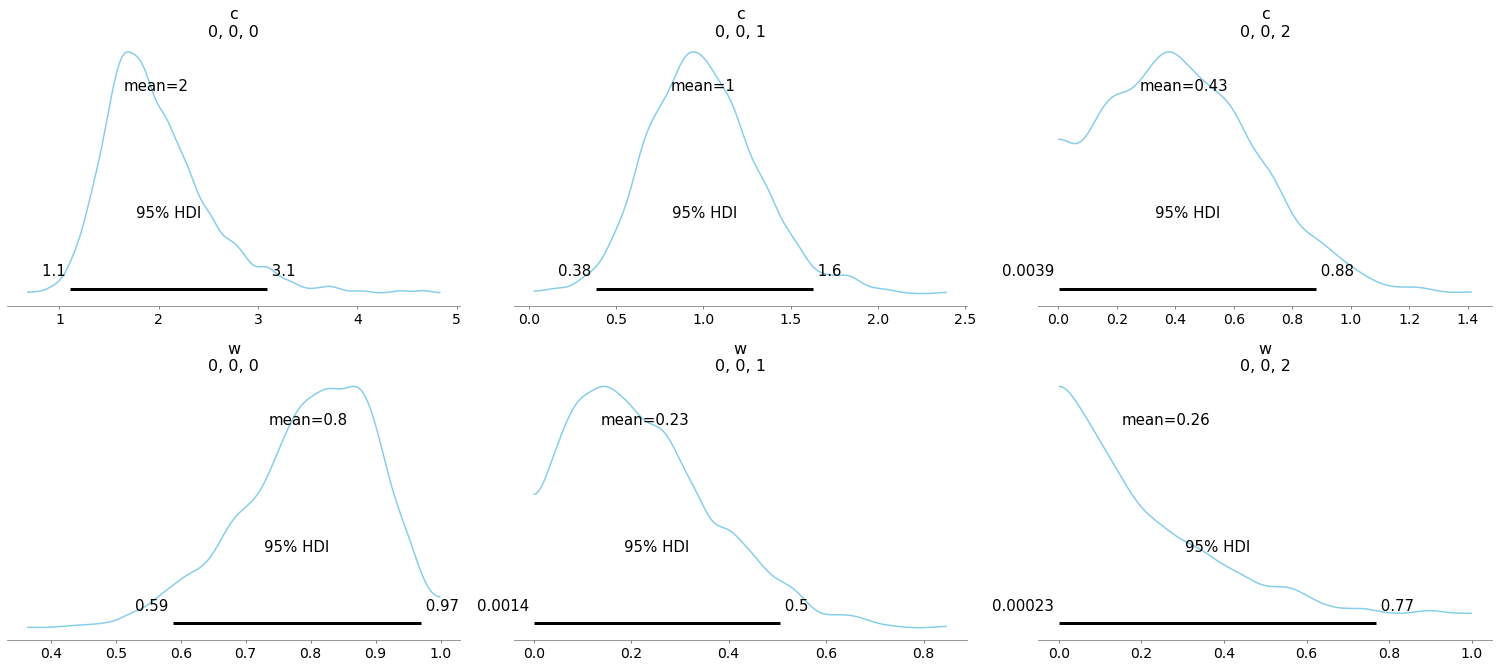

In [30]:
with pm.Model() as model3:
    c = pm.Uniform("c", lower=00, upper=10,  transform=None,shape=(1, 1, number_grp))
    w = pm.Uniform("w", lower=0, upper=1, transform=None,shape=(1, 1, number_grp))
    #b =  pm.Uniform("b", lower=0, upper=1,transform=None,shape=(1, 1, number_grp))
    b = 0.5

    sij = tt.exp(-c * (w * d1_t + (1 - w) * d2_t))

    sum_ajsij = tt.sum(a1 * sij, axis=1)
    sum_najsij = tt.sum((1 - a1) * sij, axis=1)

    ri = pm.Deterministic(
        "ri", (b * sum_ajsij) / (b * sum_ajsij + (1 - b) * sum_najsij)
    )

    yi = pm.Binomial("yi", p=ri, n=n_stim, observed=y2)

    #trace2 = pm.sample()
    #step = pm.NUTS(target_accept=0.999)
    trace3 = pm.sample(2000,tune = 4000)
    

az.plot_trace(trace3, var_names=["c", "w"], compact=True);
pm.plot_posterior(trace3,  color='skyblue',hdi_prob=0.95,var_names=["c", "w"])
plt.show()
#pm.summary(trace3)

# ppc for model3

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


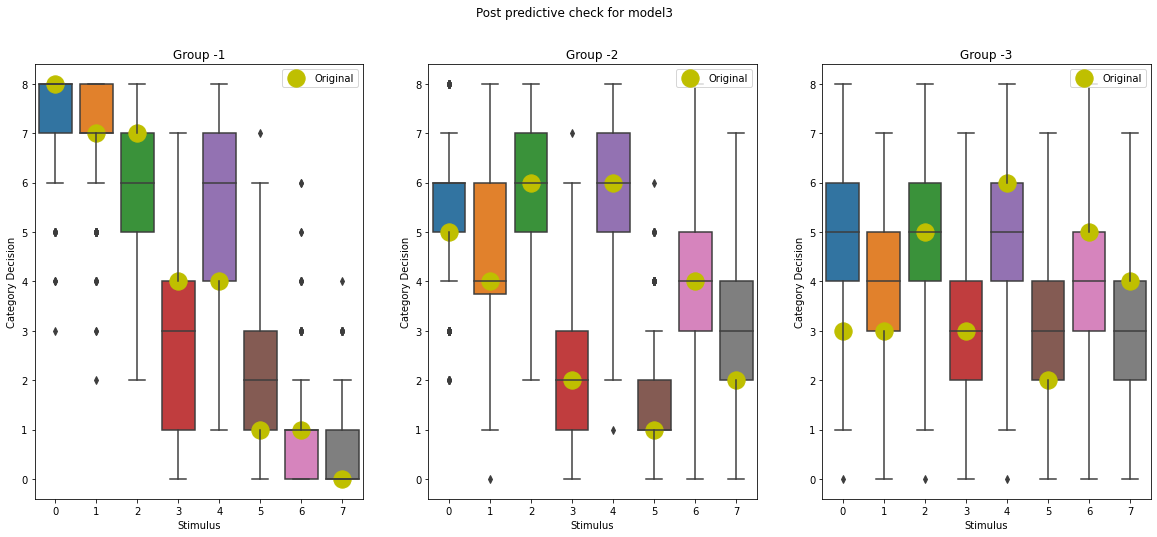

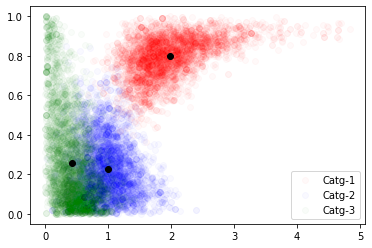

categories 1,2,3 are similar  to subjects 3,39,31 respectively


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,waic,waic_se,p_waic,n_samples,n_data_points,warning,waic_scale
0,-34.5763,1.64956,2.20333,4000,24,False,log


In [32]:
ppc3 = pm.sample_posterior_predictive(trace3, samples=500, model=model3)
yipred3 = ppc3["yi"]
grp1,grp2,grp3 = [],[],[]
for i in range(500):
  grp1.append( yipred3[i][:,0] )
  grp2.append( yipred3[i][:,1] )
  grp3.append( yipred3[i][:,2] )
grp = [grp1,grp2,grp3]
#plot_grp = np.array()

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Post predictive check for model3')
for i in range(3): 
  sns.boxplot(data =np.array(grp[i]),ax=axes[i] )
  #plt.boxplot(ppc['yi'],patch_artist=True)
  axes[i].scatter(np.arange(0,8),subject_grp_data.iloc[i],color = 'y',s=300,label ='Original')
  #axes.set_title("Post Predicted Data vs Original ")
  axes[i].set_title('Group -'+str(i+1))
  axes[i].set_xlabel("Stimulus")
  axes[i].set_ylabel("Category Decision");
  axes[i].legend(loc ='upper right')
plt.show()
model3_c= np.squeeze(trace3["c"])
model3_w = np.squeeze(trace3["w"])
#colors = cm.rainbow(np.linspace(0, 1, nsubj))
plt.scatter(model3_c[:,0],model3_w[:,0],color = 'red',label = 'Catg-1',alpha = 0.025)
plt.scatter(model3_c[:,1],model3_w[:,1],color = 'blue',label = 'Catg-2',alpha = 0.025)
plt.scatter(model3_c[:,2],model3_w[:,2],color = 'green',label = 'Catg-3',alpha = 0.025)
plt.scatter(np.mean(model3_c, axis=0),np.mean(model3_w, axis=0), color = 'black')
plt.legend()
plt.show()
print('categories 1,2,3 are similar  to subjects 3,39,31 respectively')
model3_waic=az.waic(trace3, model3)
pd.DataFrame(model3_waic).drop('waic_i').T




##1. we have chosen three subcategories, with reference to subjects 3,39, 41 shown in the above plot.
## 2.Considerd nonpooled model without hierarchy, It  did a decent job in post predictive check.
## 3. But has many  divergences, so we shall model another unpooled model(without hiearchy) one category for each group.  

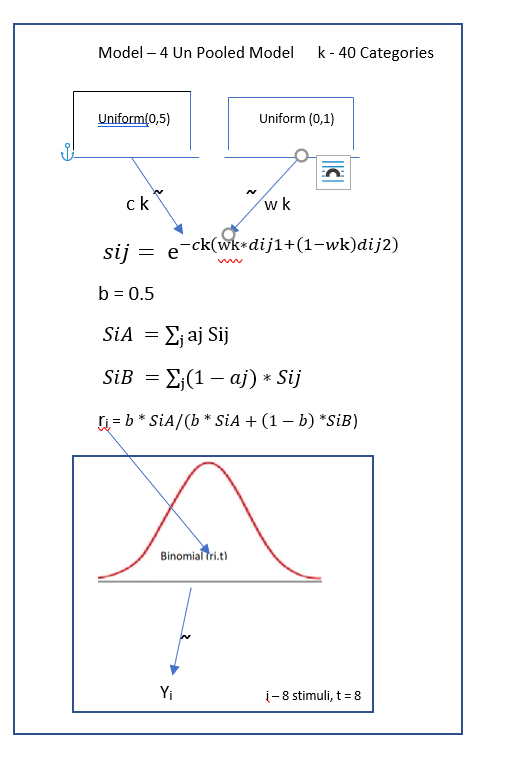

In [33]:
x2 = np.array(data["x"])
subjvect = []
stimvect = []
respvect = []
for i in range(n_stim):
    for j in range(partcpnts):
        subjvect.append(j + 1)
        stimvect.append(i + 1)
        respvect.append(x2[j, i])

#df = pd.DataFrame(np.c_[respvect, stimvect, subjvect], columns=["Resp", "Stim", "Sbj"])
a1 = np.tile(overall_stimdata.a, [n_stim, 1])[:, :, np.newaxis]
y2 = x2.transpose()
d1_t = np.tile(d1[:, :, np.newaxis], [1, 1, partcpnts])
d2_t = np.tile(d2[:, :, np.newaxis], [1, 1, partcpnts])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, c]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 24 seconds.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f967aa6ea50>,
      dtype=object)

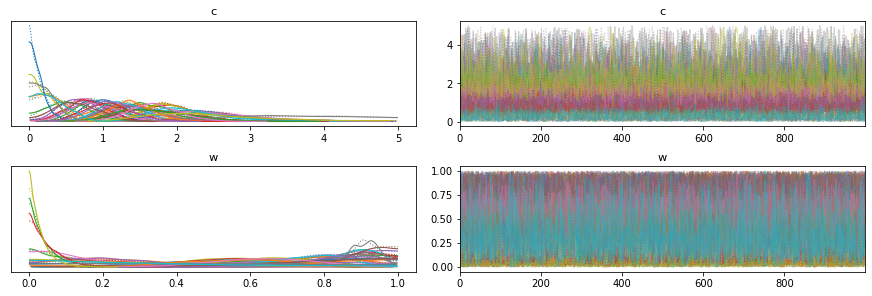

In [34]:
with pm.Model() as model4:
    c = pm.Uniform("c", lower=0, upper=5, shape=(1, 1, partcpnts))
    w = pm.Uniform("w", lower=0, upper=1, shape=(1, 1, partcpnts))
    b = 0.5

    sij = tt.exp(-c * (w * d1_t + (1 - w) * d2_t))

    sum_ajsij = tt.sum(a1 * sij, axis=1)
    sum_najsij = tt.sum((1 - a1) * sij, axis=1)

    ri = pm.Deterministic(
        "ri", (b * sum_ajsij) / (b * sum_ajsij + (1 - b) * sum_najsij)
    )

    yi = pm.Binomial("yi", p=ri, n=n_stim, observed=y2)

    trace4 = pm.sample()

az.plot_trace(trace4, var_names=["c", "w"], compact=True)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


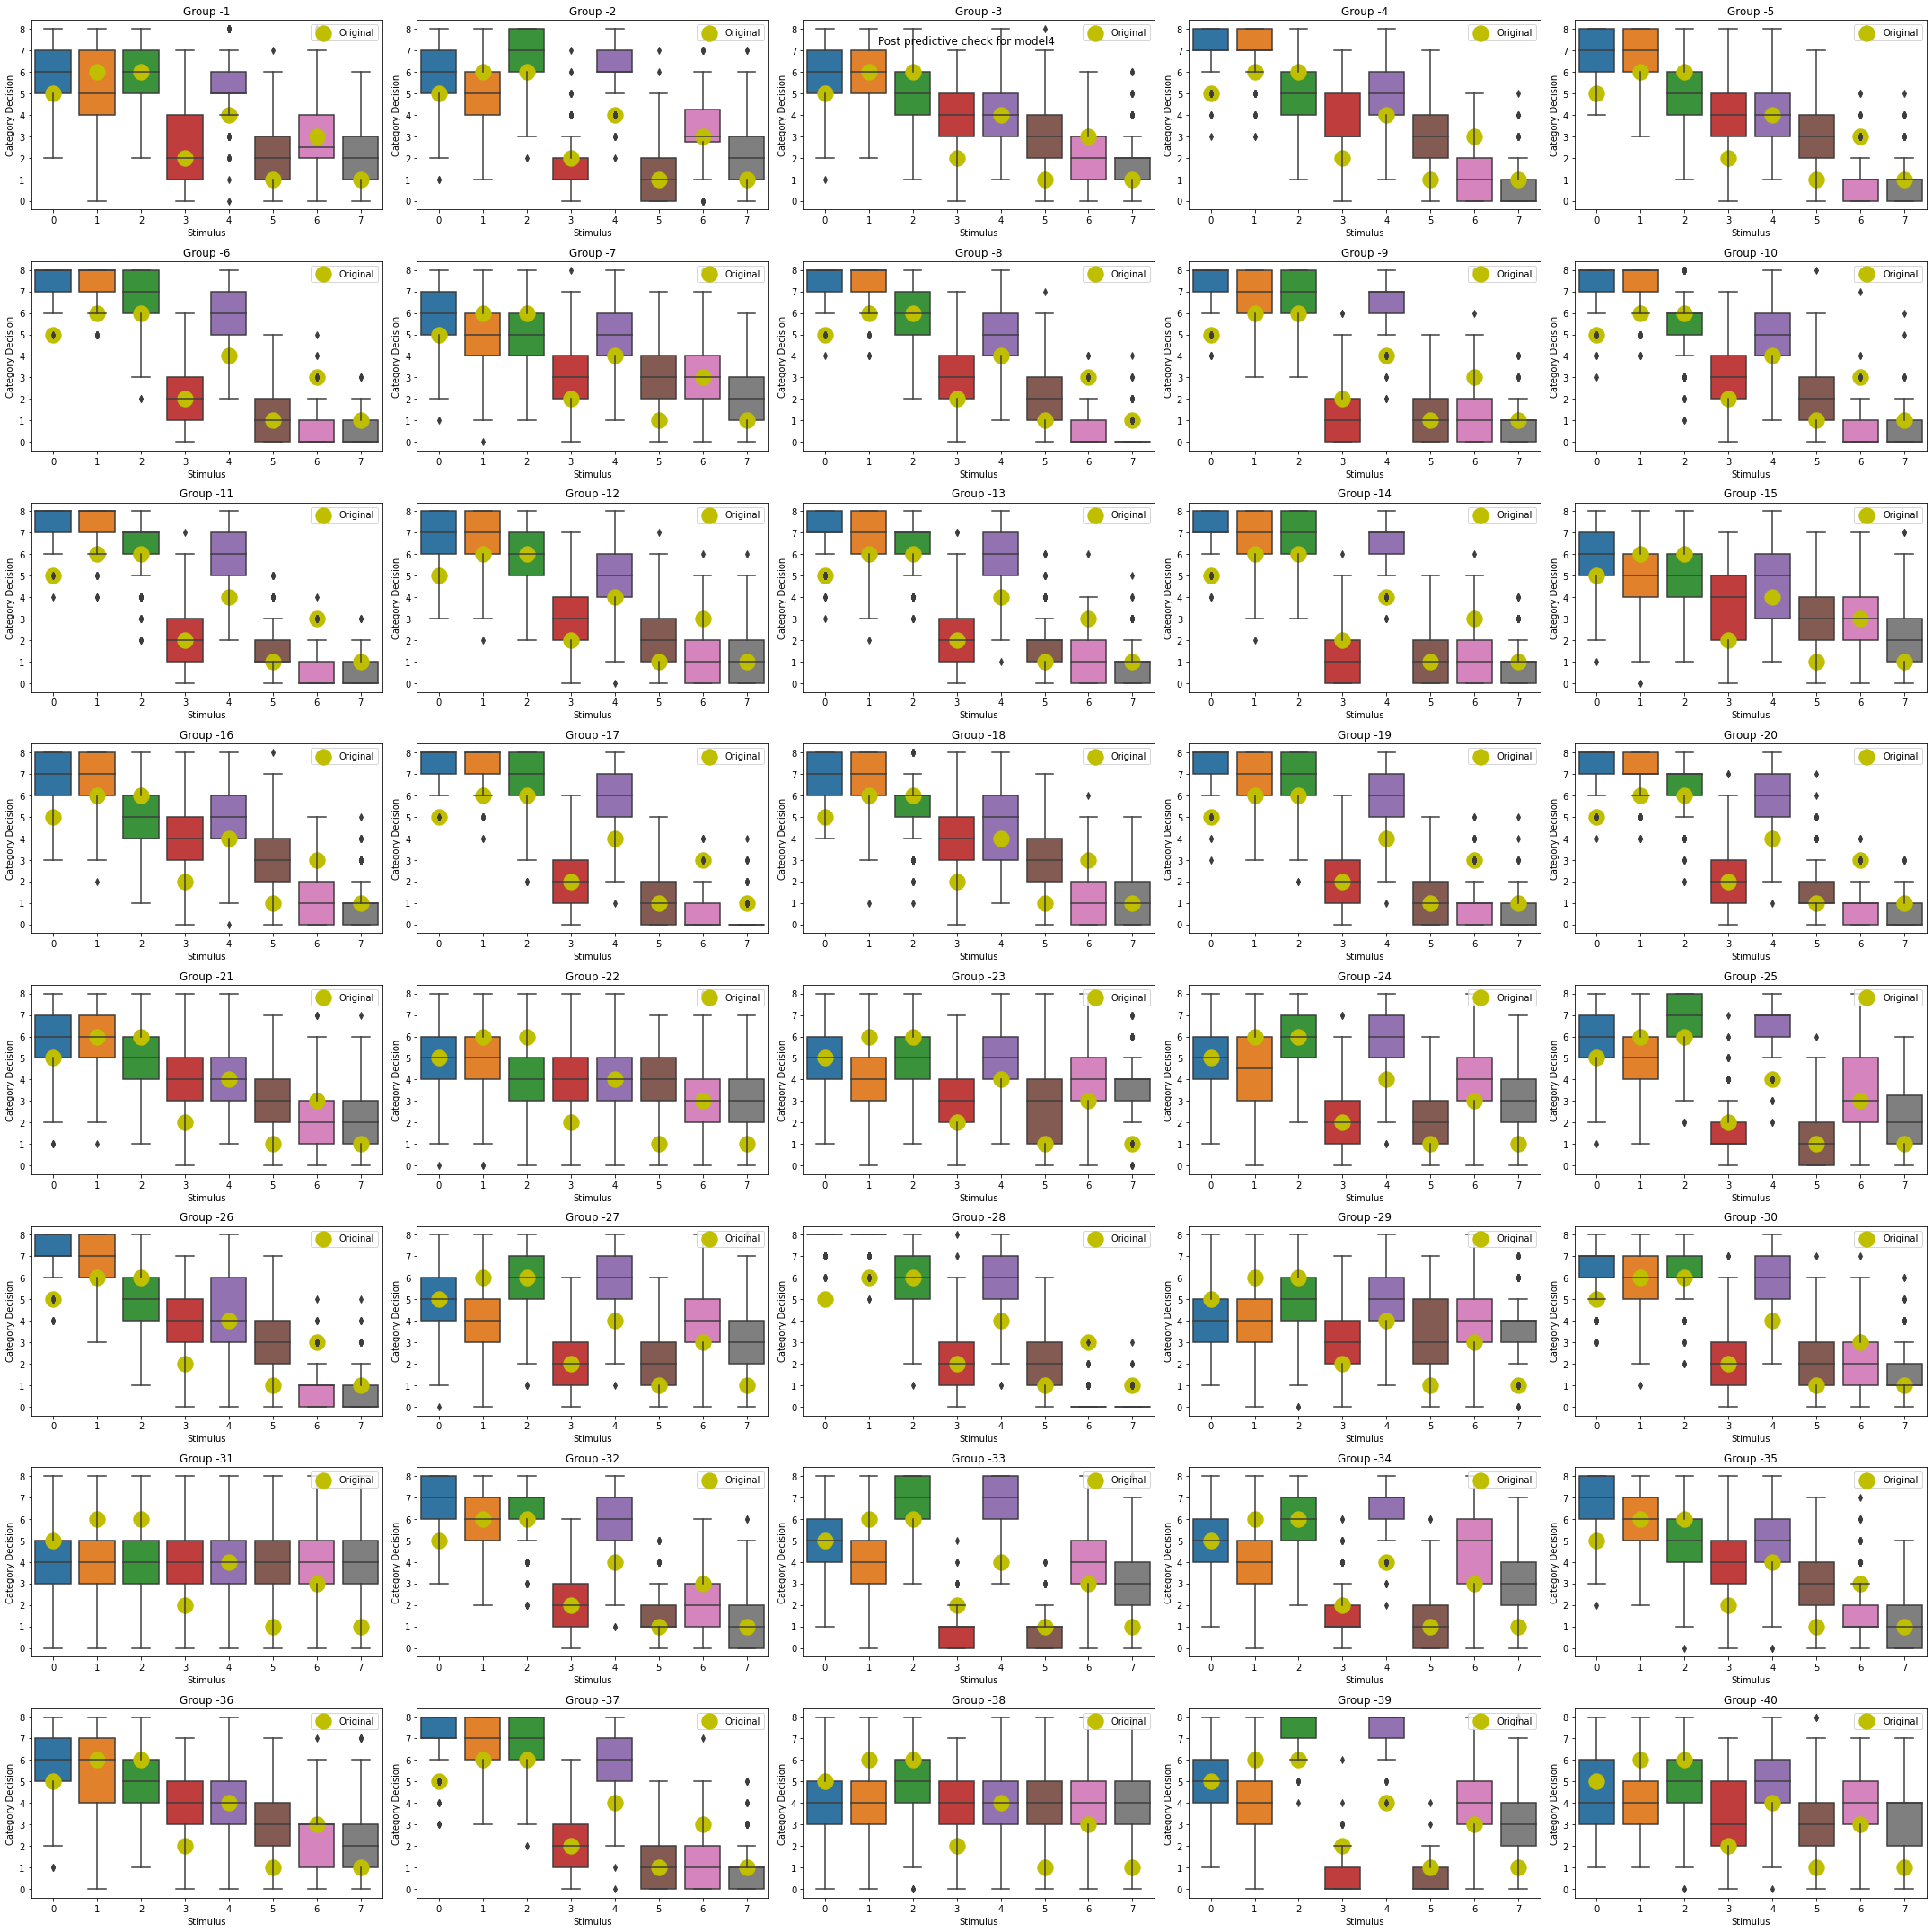

In [35]:
ppc4 = pm.sample_posterior_predictive(trace4, samples=500, model=model4)
yipred4 = ppc4["yi"]
extract_dict = {}
for i in range(40):
  id = 'grp'+str(i)
  extract_dict[id] = []
#grp1,grp2,grp3 = [],[],[]

for i in range(500):
  for j in range(40):
    id = 'grp'+str(j)
    extract_dict[id].append(yipred4[i][:,j])
fig, axes = plt.subplots(8, 5)
fig.suptitle('Post predictive check for model4')
j=0
for i in range(40):
  if j%5 == 0:
    j=0 
  id = 'grp'+str(i)
  sns.boxplot(data =np.array(extract_dict[id]),ax=axes[int(i/5),j] )
  #plt.boxplot(ppc['yi'],patch_artist=True)
  axes[int(i/5),j].scatter(np.arange(0,8),subjectdata.drop('group_idx',axis=1).iloc[0],color = 'y',s=300,label ='Original')
  #axes.set_title("Post Predicted Data vs Original ")
  axes[int(i/5),j].set_title('Group -'+str(i+1))
  axes[int(i/5),j].set_xlabel("Stimulus")
  axes[int(i/5),j].set_ylabel("Category Decision");
  axes[int(i/5),j].legend(loc ='upper right')
  j=j+1
  i=i+1
fig.set_figheight(30)
fig.set_figwidth(30)
fig.tight_layout()   
plt.show()


In [36]:
model4_waic=az.waic(trace4, model4)
pd.DataFrame(model4_waic).drop('waic_i').T

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1407: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,waic,waic_se,p_waic,n_samples,n_data_points,warning,waic_scale
0,-570.959,18.1038,73.4285,2000,320,True,log


# 2e the above model, each subject considered as a different and considered their is no hierarchy in the model. we shall model another hierarchical modeland compare model4 and the new model based on waic scores, choose best model.

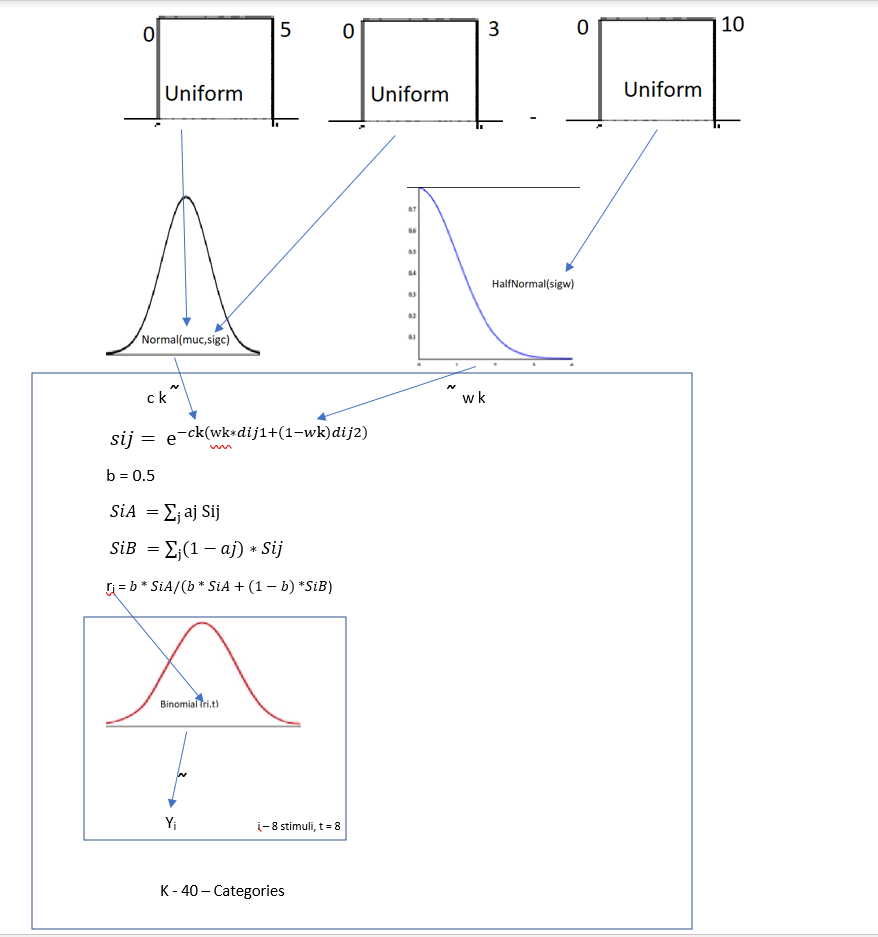

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, c, sigmac, muc, sigmaw]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 48 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


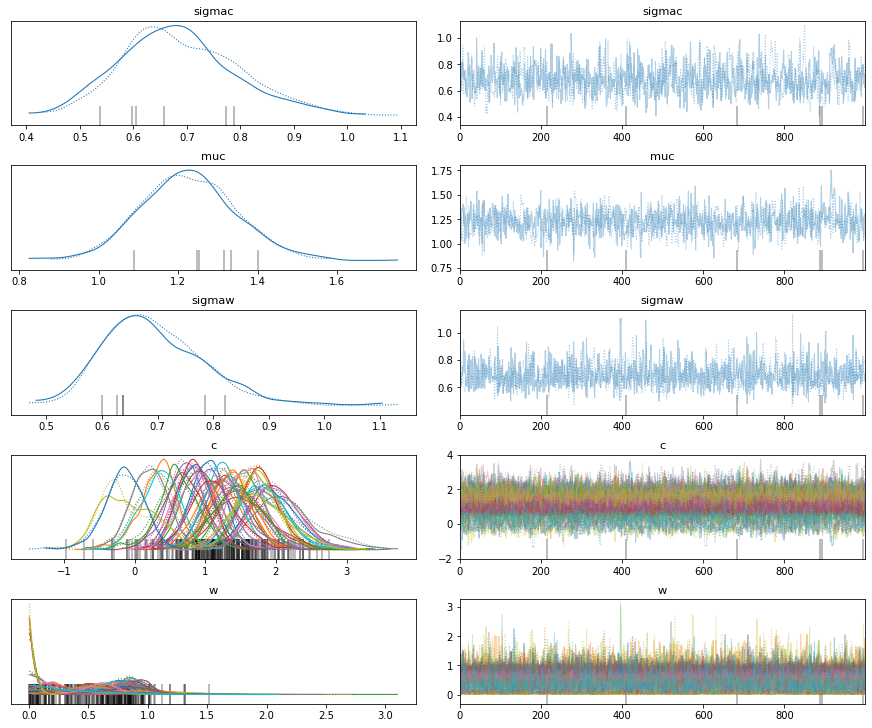

In [37]:
with pm.Model() as model5:

    
    sigmaw = pm.Uniform("sigmaw", lower=0, upper=10, testval=0.75)
   
    muc = pm.Uniform("muc", lower=0, upper=5, testval=1.4)
    sigmac = pm.Uniform("sigmac", lower=0., upper=3, testval=0.45)



    c = pm.Normal("c",  mu=muc, sigma=sigmac,  shape=(1, 1, partcpnts))
    w = pm.HalfNormal("w",sigma=sigmaw, shape=(1, 1, partcpnts))
    b = 0.5

    sij = tt.exp(-c * (w * d1_t + (1 - w) * d2_t))

    sum_ajsij = tt.sum(a1 * sij, axis=1)
    sum_najsij = tt.sum((1 - a1) * sij, axis=1)

    ri = pm.Deterministic(
        "ri", (b * sum_ajsij) / (b * sum_ajsij + (1 - b) * sum_najsij)
    )

    yi = pm.Binomial("yi", p=ri, n=n_stim, observed=y2)

    trace5 = pm.sample(tune=2000)

az.plot_trace(trace5, var_names=["sigmac","muc","sigmaw","c", "w"], compact=True)

plt.show()

In [ ]:
df_comp_WAIC = az.compare({"model4": trace4, "model5": trace5},ic='WAIC')
df_comp_WAIC

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1407: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWar

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model4,0,-571.352140,73.925030,0.000000,0.679277,18.144569,0.000000,True,log
model5,1,-574.948272,77.812684,3.596132,0.320723,17.217990,4.465698,True,log


# Additional summary
##As per WAIc scores 
##model1 is  selected over model2  (model1 and model2- all participants are considered as 1 unit)
## model1 parametes C and W
## model2 parameers c, w and b  
## model4 is selected over model5
## model 4 - non hiearchical model each subject considerd as 1 category individual. 
## model 5 - hiearchical model each subject considerd as 1 category individual.

